# Ford Gobike Data Analysis
## by Moaaz Mahmoud

## Preliminary Wrangling

> This dataset represents trips taken by members of the service for month of February of 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb; sns = sb # Just another alias for seaborn
from datetime import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

It seems reasonable here to do some cleaning by dropping the rows containing null values for all the columns.

In [4]:
gobike = gobike.dropna(how='any',axis=0)
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

It might also be useful to display some summary statistics for the data at this point.

In [5]:
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> The dataset contains 174952 rows, each representing one observation about a certain ride. The dataset contains 14 columns, each representing a certain feature, namely:
> - duration_sec
> - start_time
> - end_time
> - start_station_id
> - start_station_name
> - start_station_latitude
> - start_station_longitude
> - end_station_id
> - end_station_name
> - end_station_latitude
> - end_station_longitude
> - bike_id
> - user_type
> - member_birth_year
> - member_gender
> - bike_share_for_all_trip
>
> Eight of these columns are numeric, and six are categorical.

### What is/are the main feature(s) of interest in your dataset?

> The main feature I'm interested in is the 'duration_sec' and will particularly focus on how the other features influence it.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> My hypothesis is that the trip duration will be most highly influenced by those variables:
> - start_time — the time the trip started
> - user_type — the type of the user (Subscriber/Customer)
> - member_birth_year — the year the user was born
> - member_gender — the gender of the user

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Let's begin with the distribution of our main variable (`duration_sec`).

''

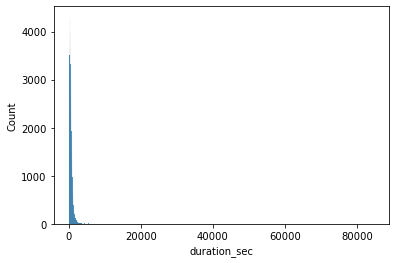

In [6]:
sns.histplot(data=gobike, x='duration_sec')
;

I will make some trial-and-error plots with different limits for the x-axis in the next cell to take an action with the outliers.

''

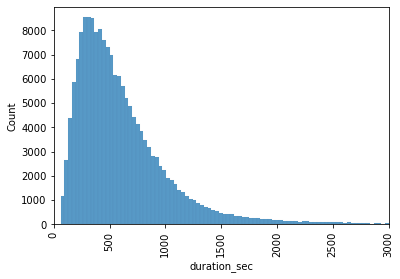

In [7]:
sns.histplot(data=gobike, x='duration_sec', bins=2500)
plt.xticks(np.arange(0, 3500, 500), rotation=90)
plt.xlim(0, 3000)
;

It seems best to keep the rows with durations up to 3000 seconds. We will present the distribution for the durations once more.

''

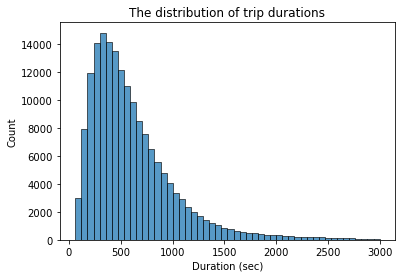

In [8]:
gobike = gobike.query('duration_sec <= 3000')
sns.histplot(data=gobike, x='duration_sec', bins=50)
plt.xlabel('Duration (sec)')
plt.title('The distribution of trip durations')
;

The distribution is left-skewed.

We can probably move on to the next variables right now.

#### Univariate Exploration – Numeric Columns

I will create two `Index` objects, one for numeric (quantitative) data, and the other for categorical data. We will possibly use them frequently later.

In [9]:
# For numeric data
numeric_columns = gobike.columns[[0, 3, 5, 6, 7, 9, 10, 11, 13]]
# For categorical data
categorical_columns = gobike.columns[[1, 2, 4, 8, 12, 14, 15]]

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

To view the distribution for each column, I will use a series of histograms for numeric columns and a series of bar charts (`countplot`s) for categorical columns.

''

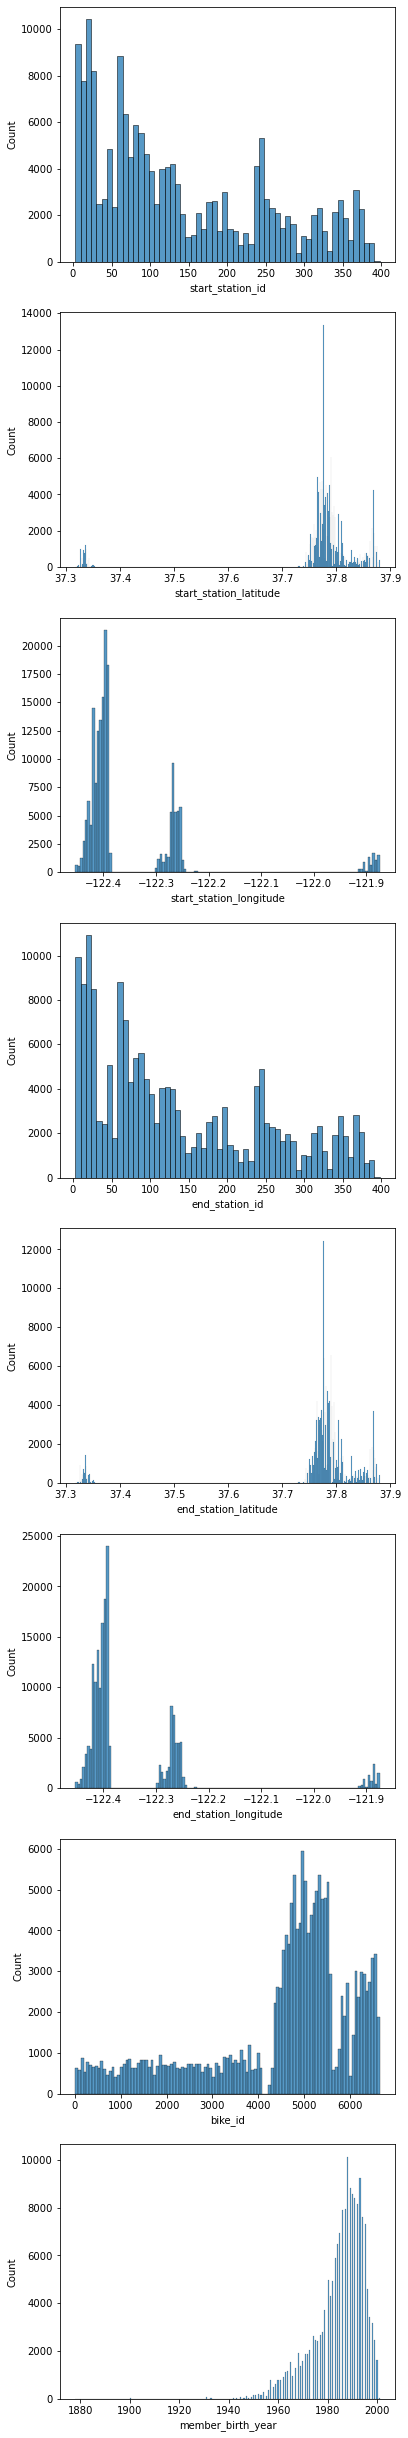

In [10]:
# Numeric Data
plt.figure(figsize=(6, 5*numeric_columns.size-1))

i = 1
for col in numeric_columns[1:]:
    plt.subplot(numeric_columns.size-1, 1, i); i+=1
    sns.histplot(data=gobike, x=col)
    plt.xlabel(col)
;

To better view the age, I will perform some quick processing for the birth year column.

In [11]:
# Handle the outliers in member_birth_year
gobike = gobike.query('member_birth_year >= 1940')
# Replace the birth year with the age, assuming we are in 2021
gobike['member_birth_year'] = 2021 - gobike['member_birth_year'] 
gobike.rename(columns={'member_birth_year':'member_age'}, inplace=True)
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_age,member_gender,bike_share_for_all_trip
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,47.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,62.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,38.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,32.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,33.0,Other,No


''

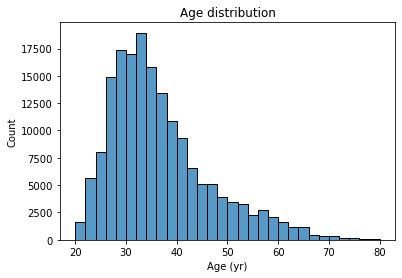

In [12]:
sns.histplot(data=gobike, x='member_age', bins=30)
plt.xlabel('Age (yr)')
plt.title('Age distribution')
;

We will next move on to categorical columns.

#### Univariate Exploration – Categorical Columns

In [13]:
for col in categorical_columns:
    print(f'{col:<24}  {gobike[col].unique().size}')

start_time                172814
end_time                  172812
start_station_name        329
end_station_name          329
user_type                 2
member_gender             3
bike_share_for_all_trip   2


I will do a bit of cleaning here.

In [14]:
gobike.start_time = pd.to_datetime(gobike.start_time, format='%Y-%m-%d %H:%M:%S')
gobike.drop(columns=['end_time'], inplace=True)
gobike.head()

,duration_sec,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_age,member_gender,bike_share_for_all_trip
4,1585,2019-02-28 23:54:18.549,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,47.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,62.0,Male,No
6,1147,2019-02-28 23:55:35.104,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,38.0,Female,No
7,1615,2019-02-28 23:41:06.766,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,32.0,Male,No
8,1570,2019-02-28 23:41:48.790,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,33.0,Other,No


In [15]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172825 entries, 4 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             172825 non-null  int64         
 1   start_time               172825 non-null  datetime64[ns]
 2   start_station_id         172825 non-null  float64       
 3   start_station_name       172825 non-null  object        
 4   start_station_latitude   172825 non-null  float64       
 5   start_station_longitude  172825 non-null  float64       
 6   end_station_id           172825 non-null  float64       
 7   end_station_name         172825 non-null  object        
 8   end_station_latitude     172825 non-null  float64       
 9   end_station_longitude    172825 non-null  float64       
 10  bike_id                  172825 non-null  int64         
 11  user_type                172825 non-null  object        
 12  member_age      

It's necessary here to update `numeric_columns` and `categorical_columns`.

In [16]:
numeric_columns = gobike.columns[[0, 1, 2, 4, 5, 6, 8, 9, 10, 12]]
categorical_columns = gobike.columns[[3, 7, 11, 13, 14]]

We can finally view the distributions for those categorical columns using bar charts.
- user_type
- member_gender
- bike_share_for_all_trip 

''

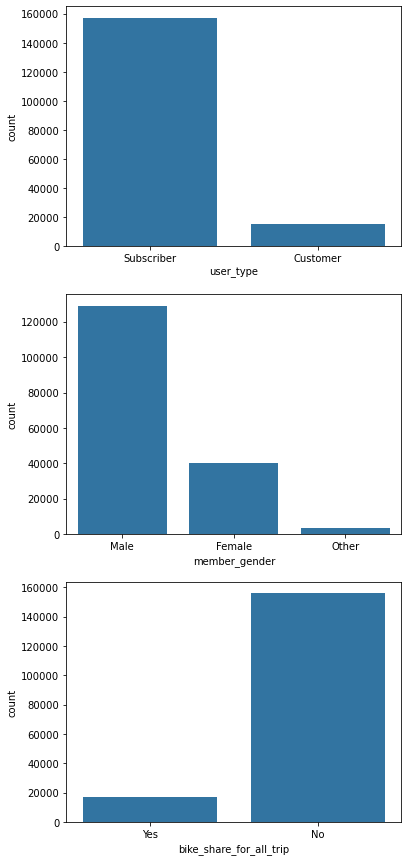

In [17]:
plt.figure(figsize=(6, 5*3))
i=1
for col in ['user_type', 'member_gender', 'bike_share_for_all_trip']:
    plt.subplot(3, 1, i); i+=1
    sns.countplot(data=gobike, x=col, color=sns.color_palette()[0])
;

### Univariate Exploration – `datetime` Data

> #### Note
>> This distribution for this column could have also been displayed with the numerical data.
>>
>>
> <span style="color:white">.</span>

''

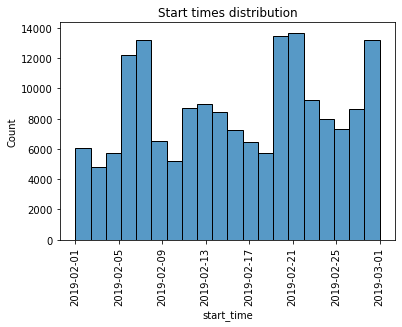

In [18]:
sns.histplot(data=gobike, x='start_time', bins=20)
plt.xticks(rotation=90)
plt.title('Start times distribution')
;

The distribution is multimodal, as it's more reasonable for the durations to be dependent on the time of the day (morning/noon/...).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes, there were some outliers within some of the columns that needed to be trimmed, some of the points were very abnormal, e.g. users born before 1900.
>
> I will summarize the rest of my findings into three points:
> - The number of _Subscriber_ users is way more than the _Customer_ users
> - The ages of the users follow some kind of statistical distribution that has a right-skewed, mostly-bimodal nature
> - The number of males is considerably higher than the number of females

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the beginning, there were some null values that needed to be cleaned. After that, the plots sjowed some outliers that needed to be trimmed to get a clearer view of the distributions. Other actions tht could be taken include performing a log transform for one of the axes.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Here, I will display some plots of the duration against some other variables.

''

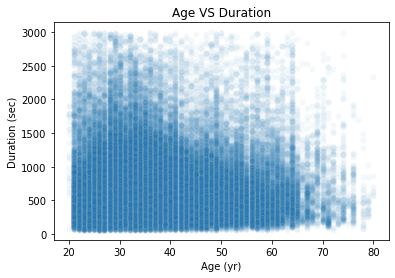

In [19]:
# VS age – cont.

# Scatter plot
sns.scatterplot(data=gobike, x='member_age', y='duration_sec', alpha=0.05)
plt.xlabel('Age (yr)')
plt.ylabel('Duration (sec)')
plt.title('Age VS Duration')
;

As we go upwards through the graph, the density of the points decreases. This becomes more obvious as we move to the right. That is, the density of trips decreases as the duration increases, and this is especially true for higher ages.

''

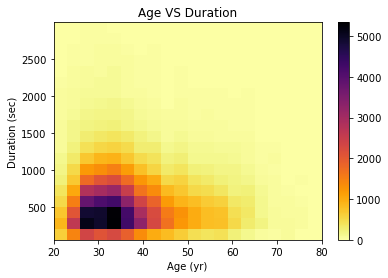

In [20]:
# VS age – cont.

# Heatmap
plt.hist2d(data=gobike, x='member_age', y='duration_sec', cmap='inferno_r', bins=20)
plt.colorbar()
plt.xlabel('Age (yr)')
plt.ylabel('Duration (sec)')
plt.title('Age VS Duration')
;

The stair-like look of the heatmap leads us to the same observation we made from the scatter plot. We can clearly see that higher durations are concentrated at the left part of the map.

''

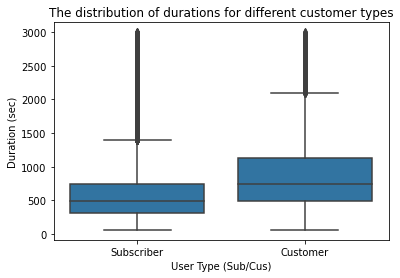

In [21]:
# VS user type
sns.boxplot(data=gobike, x='user_type', y='duration_sec', color=sns.color_palette()[0])
plt.xlabel('User Type (Sub/Cus)')
plt.ylabel('Duration (sec)')
plt.title('The distribution of durations for different customer types')
;

The durations of the trips of _Customer_ clients are, on average, longer than those of the _Subscriber_ clients. We noted before that the number of subscribers is higher.

''

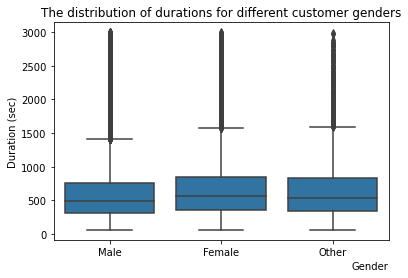

In [22]:
# VS gender
sns.boxplot(data=gobike, x='member_gender', y='duration_sec', color=sns.color_palette()[0])
plt.xlabel('Gender', loc='right')
plt.ylabel('Duration (sec)')
plt.title('The distribution of durations for different customer genders')
;

The females' rides take, on average, longer durations than males'. Though the number of males is considerably higher as noted from a previous plot.

Before we move on to the next stage (multivariate exploration), we may make some plots, that, opposed to the previous ones, do not involve the main feature.

''

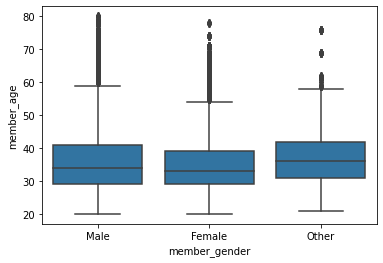

In [23]:
# Age VS Gender
sns.boxplot(data=gobike, x='member_gender', y='member_age', color=sns.color_palette()[0])
;

The ages of males seem, in general, **slightly** higher than the ages of females.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The feature that had the most impact on the duration appeared to be the age. This is especially obvious through the heatmap.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The ages of males are, in general, slightly higher than the ages of females.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Up till now, we have focused on the main feature (duration in seconds or 'duration_sec') and some other features that we believe have a higher impact on the main feature, namely 'member_gender', 'user_type', and 'member_age'. Now, we are going to further explore the relationship between the main feature and the other features with a special focus on the ones of more importance.

''

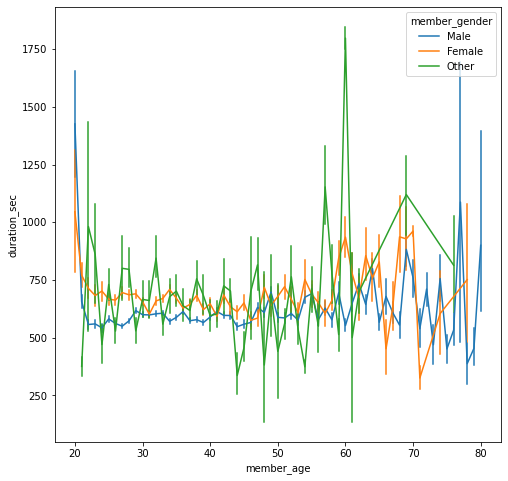

In [24]:
# Duration – Gender – Age
plt.figure(figsize=(8, 8))
sns.lineplot(data=gobike, x='member_age', y='duration_sec', hue='member_gender', err_style='bars')
;

Will keep the plot with bars for error intervals but will create another plot with error bars removed for improved readability. I will try to polish the next plot as much as I can.

''

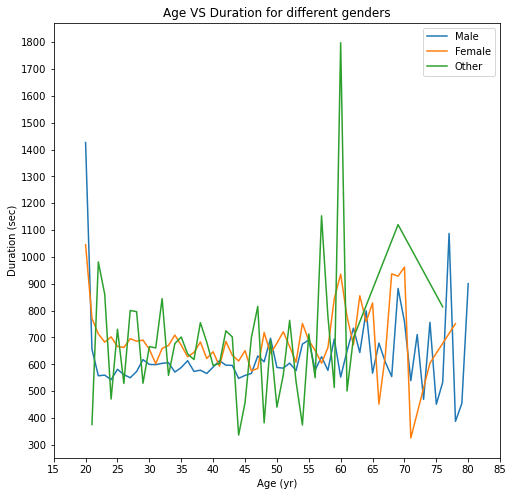

In [25]:
# Duration – Gender – Age (No error bars)
plt.figure(figsize=(8, 8)) # A larger size for the plot is needed for clarity
sns.lineplot(data=gobike, x='member_age', y='duration_sec', hue='member_gender', err_style=None)
plt.xlabel('Age (yr)')
plt.ylabel('Duration (sec)')
plt.title('Age VS Duration for different genders')
plt.xticks(np.arange(15, 90, 5))
plt.yticks(np.arange(300, 1900, 100))
plt.legend(title='')
;

For most ages, the trip durations are generally higher for females. For users with unknown genders, it's natural that the line goes in a stochastic way.

''

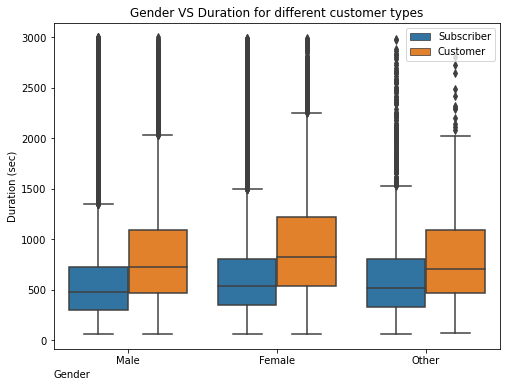

In [26]:
# Duration – Gender – Type
plt.figure(figsize=(8, 6))
sns.boxplot(data=gobike, x='member_gender', y='duration_sec', hue='user_type')
plt.legend(loc=1)
plt.xlabel('Gender', loc='left')
plt.ylabel('Duration (sec)')
plt.yticks(np.arange(0, 3000+500, 500))
plt.title('Gender VS Duration for different customer types')
;

We can observe that, when grouped by user gender, the trips are generally longer customer users. The fact that female trips are longer is also obvious here.

The last plot I will present will display the relationship between the start time and the duration of trips for different genders and different user types.

''

<Figure size 720x720 with 0 Axes>

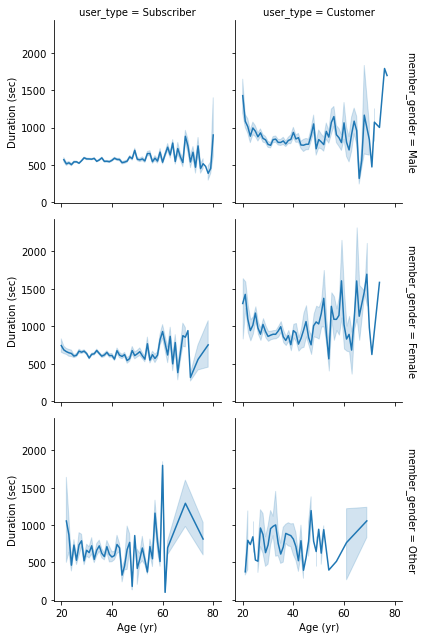

In [27]:
plt.figure(figsize=(10, 10))
g = sns.FacetGrid(data=gobike, col='user_type', row='member_gender', margin_titles=True)
g.map(sns.lineplot, 'member_age', 'duration_sec')
for ax in g.axes.flat:
    ax.set(ylabel='Duration (sec)')
    ax.set(xlabel='Age (yr)')
;

There is no obvious relationship for any gender/type.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The observations in this part do not vary a lot from previous observations. Trip durations are especially dependent on the age of the user, their gender, and their type(Subscriber/Customer)

### Were there any interesting or surprising interactions between features?

> Haven't seen something totally surprising or unexpected but the age dependency is higher than I expected. Maybe I expected the gender to have a higher impact than the age, which does not agree with the results.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!